# Download and Visualize EuroSat Data

In this notebook, we use the torchgeo dataset/datamodules to download the EuroSat dataset (spatial and nonspatial split versions). We then plot a random sample of 6 images (with labels) from the training set and the test set for each dataset version. We also calculate the number of samples in each split for each version (spatial and nonspatial).

In [2]:
import os
from torch.utils.data import DataLoader
from torchgeo.datasets import EuroSAT, EuroSATSpatial, EuroSAT100

### EuroSAT 100

In [42]:
eurosat100_root = os.path.join("data", "eurosat100")
eurosat100_dataset_train = EuroSAT100(eurosat100_root, split="train", download=True)
eurosat100_dataset_test = EuroSAT100(eurosat100_root, split="test", download=True)

print(f'Dataset Classes: {eurosat100_dataset_train.classes}')
print(f'Number of images in train dataset: {len(eurosat100_dataset_train)}')
print(f'Number of images in test dataset: {len(eurosat100_dataset_test)}')

Dataset Classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
Number of images in train dataset: 60
Number of images in test dataset: 20


### EuroSAT

In [23]:
eurosat_root = os.path.join("data", "eurosat")
eurosat_dataset_train = EuroSAT(eurosat_root, split="train", download=True)
eurosat_dataset_test = EuroSAT(eurosat_root, split="test", download=True)

print(f'Dataset Classes: {eurosat_dataset_train.classes}')
print(f'Number of images in train dataset: {len(eurosat_dataset_train)}')
print(f'Number of images in test dataset: {len(eurosat_dataset_test)}')

Dataset Classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
Number of images in train dataset: 16200
Number of images in test dataset: 5400


### EuroSAT Spatial

In [22]:
eurosat_spatial_root = os.path.join("data", "eurosatSpatial")
eurosat_spatial_dataset_train = EuroSATSpatial(eurosat_spatial_root, split="train", download=True)
eurosat_spatial_dataset_test = EuroSATSpatial(eurosat_spatial_root, split="test", download=True)

print(f'Dataset Classes: {eurosat_spatial_dataset_train.classes}')
print(f'Number of images in train dataset: {len(eurosat_spatial_dataset_train)}')
print(f'Number of images in test dataset: {len(eurosat_spatial_dataset_test)}')

Dataset Classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
Number of images in train dataset: 16200
Number of images in test dataset: 5400


## # of Images in Each Dataset Split
Split    | EuroSAT100   | EuroSAT   | EuroSAT Spatial   |
---------|-----------   |---------  |---------          |
Train    |  60          |   16200   |   16200           |
Validate |  20          |   5400    |   5400            |
Test     |  20          |   5400    |   5400            |

## Visualize Images and Labels from Each Dataset

In [51]:
import random
# set seed for reproducibility
random.seed(44)

c:\Users\ilyon\.conda\envs\pyt\Lib\site-packages\torchgeo\datasets\eurosat.py:285: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(4, 4))


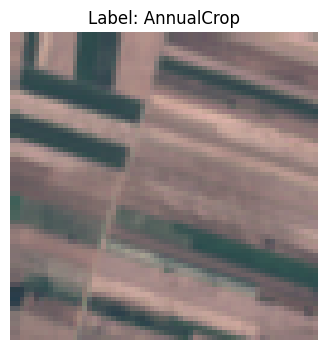

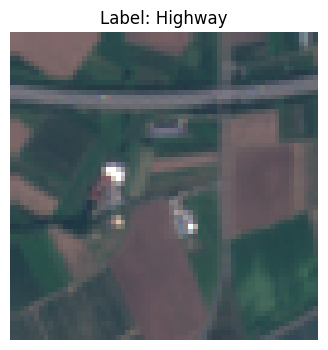

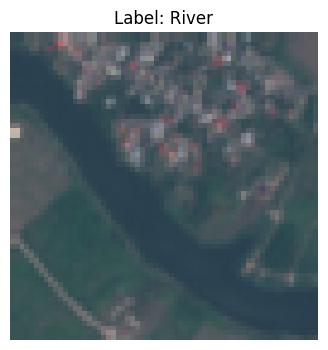

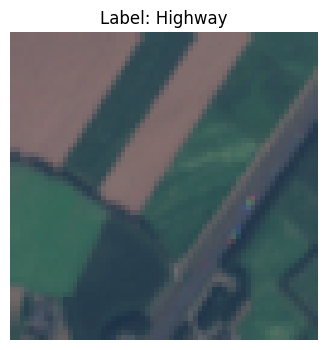

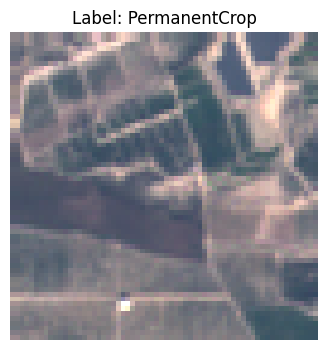

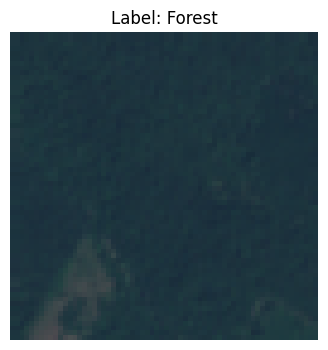

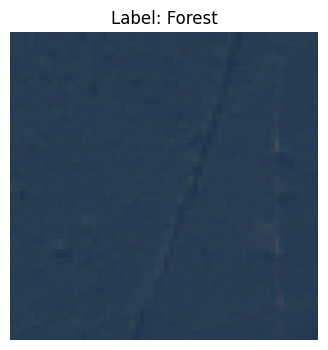

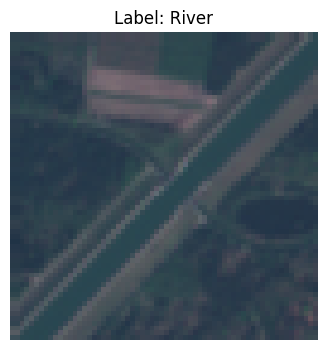

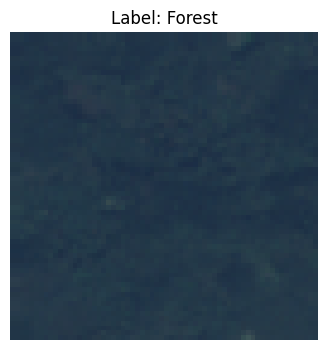

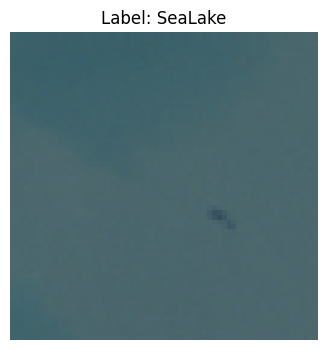

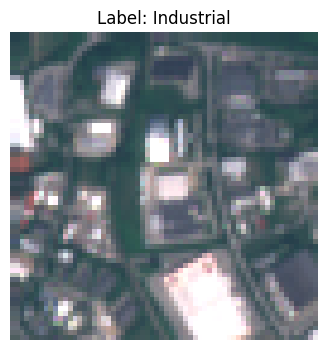

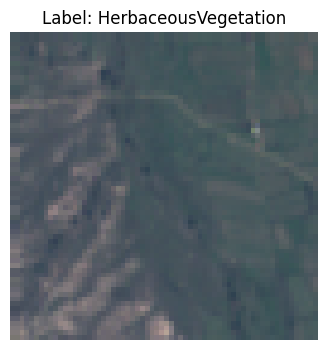

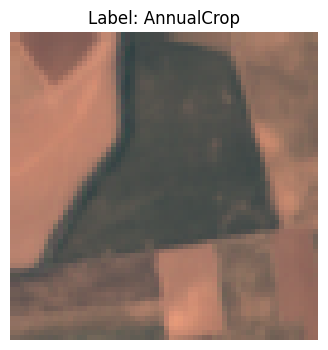

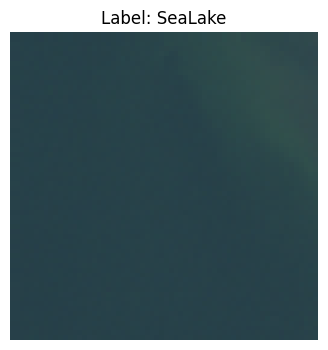

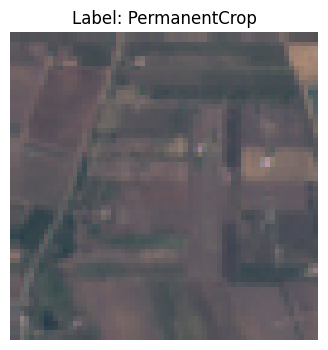

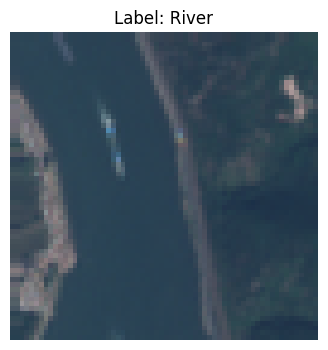

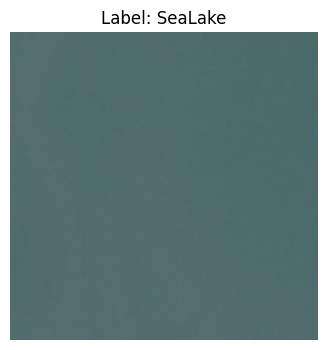

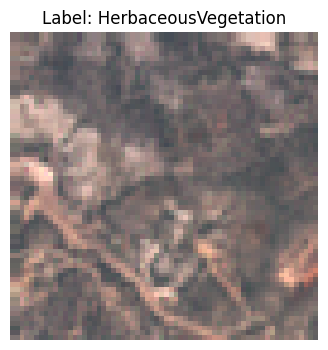

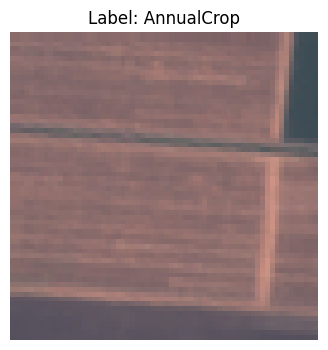

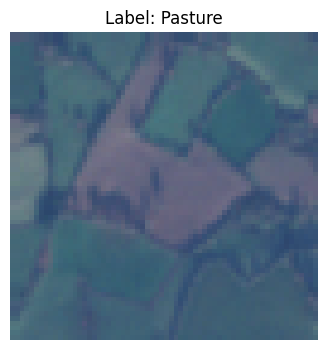

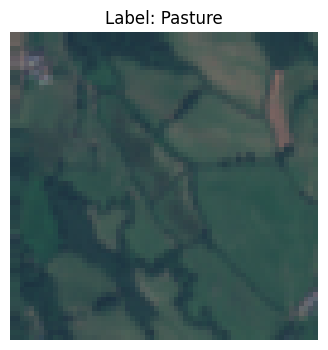

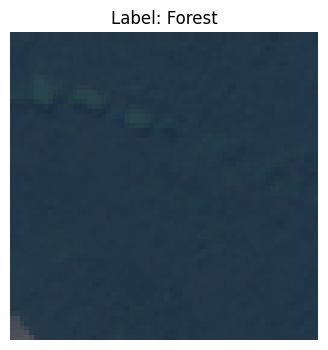

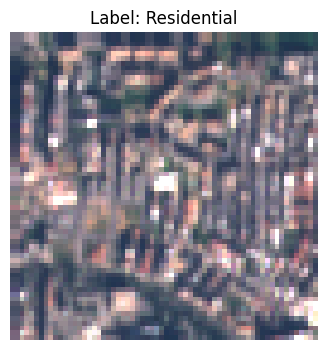

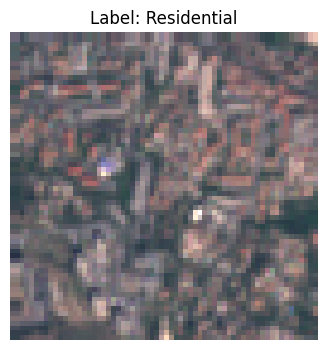

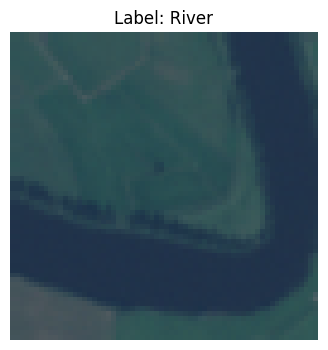

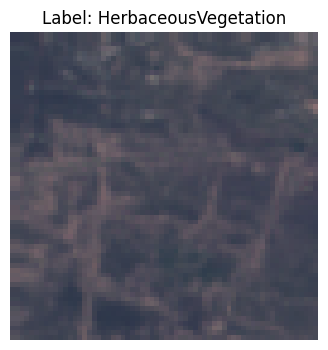

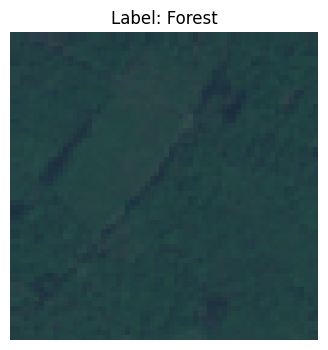

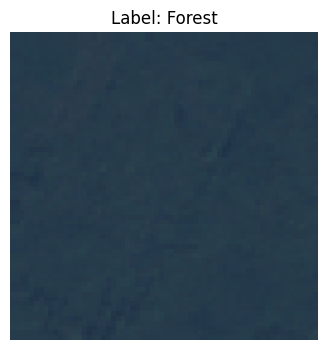

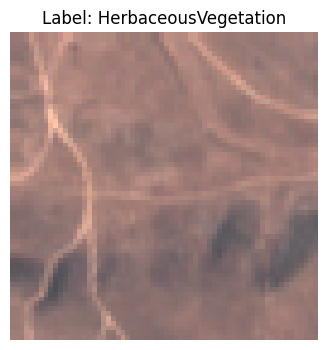

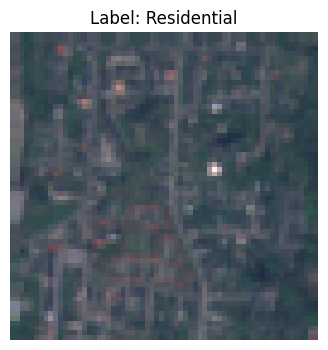

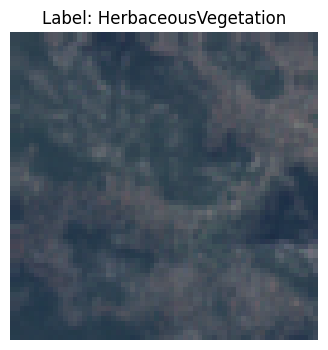

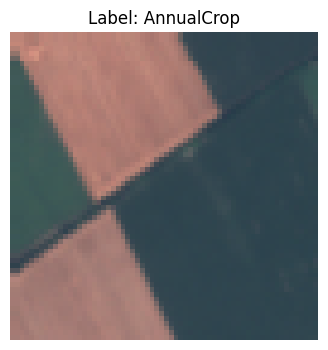

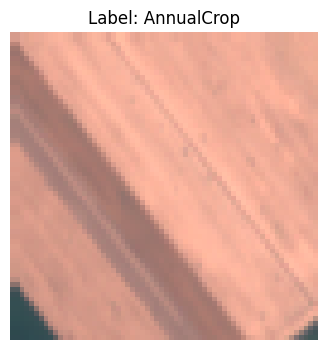

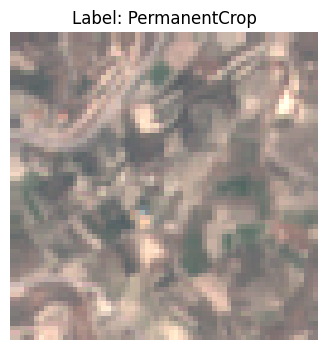

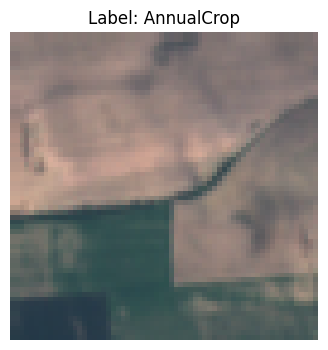

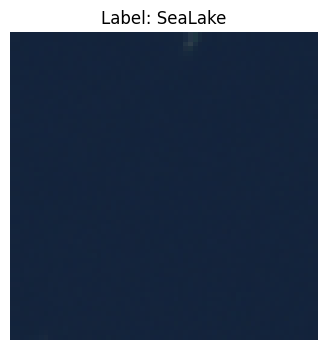

In [55]:
eurosat_datasets = {
    "eurosat_train": eurosat_dataset_train,
    "eurosat_test": eurosat_dataset_test,
    "eurosat_spatial_train": eurosat_spatial_dataset_train,
    "eurosat_spatial_test": eurosat_spatial_dataset_test
}
figures_base_path = os.path.join("figures", "eurosat100")


# sample 6 random images, plot, and export the figures
for name, dataset in eurosat_datasets.items():
    n = 0
    for i in random.sample(range(len(dataset)), 6):
        fig = dataset.plot(
            sample=dataset.__getitem__(i),
            show_titles=True
        )
        # export fig to png
        path = os.path.join("figures", "eurosat", f"{name}_{n}.png")
        fig.savefig(path)
        n += 1

### EuroSAT Spatial